# An Analysis on Black Friday Sales of a store
 
This Data Analysis is done on the purchase of a particular retail store on a Black Friday. The goal of this analysis is to see the different independent variables and how it influences the sales which is considered the dependent variable. 


## The Dataset

The dataset is taken from Kaggle which states that it has taken the data from Analytics Vidhya.
The dataset can be found [here](https://www.kaggle.com/mehdidag/black-friday#BlackFriday.csv). The dataset is of 550 000 observations and it contains different kinds of variables either numerical or categorical.

## Descriptive & Predictive Analysis
+ Different types of descriptive analysis is performed for each independent variable on total purchase
+ Predictive Analytics is performed twice. 
* When independent variable id only Age
* When independent variable is more than just one like city category, gender etc.

*To handle different categorical values- [this link](https://www.datacamp.com/community/tutorials/categorical-data#encoding)  is followed*


## Packages used
+ Pandas
+ Matplotlib
+ Numpy 
+ Sci-kit Learn


In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#increases the font size of labels in the plots
plt.rcParams.update({'font.size': 12})

In [183]:
test_df=pd.read_csv('BlackFriday.csv')
print(test_df.columns)
test_df.head()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [184]:

test_df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### Checking the count of each rows is they are same

In [185]:
test_df.count()

User_ID                       537577
Product_ID                    537577
Gender                        537577
Age                           537577
Occupation                    537577
City_Category                 537577
Stay_In_Current_City_Years    537577
Marital_Status                537577
Product_Category_1            537577
Product_Category_2            370591
Product_Category_3            164278
Purchase                      537577
dtype: int64

In [186]:
test_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


It can be seen that the max purchase is very far away from mean. Let us see if any purchase is contributing to this max value, so that outliers can be removed if there is any

### Analysis to see the abrupt high value of max
+ Will use box-plot to see the outliers
+ My x-axis will be Purchase column



Text(0.5,1,'Box Plot for Purchase Column')

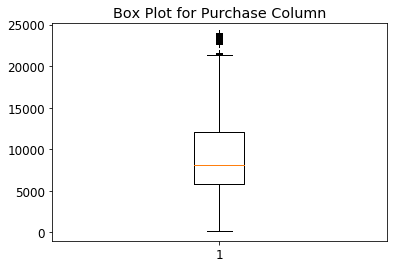

In [187]:
plt.boxplot(x=test_df['Purchase'], notch=False, sym='+', vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None, showfliers=True)
plt.title('Box Plot for Purchase Column')

It can be seen that beyond a purchase value of 21000 is an outlier for me. Let us first see, what is the count of such observations with purchase value >21000 and if we can ignore it or not

In [188]:
test_df[test_df.Purchase > 21000].count()

User_ID                       3491
Product_ID                    3491
Gender                        3491
Age                           3491
Occupation                    3491
City_Category                 3491
Stay_In_Current_City_Years    3491
Marital_Status                3491
Product_Category_1            3491
Product_Category_2            2577
Product_Category_3             641
Purchase                      3491
dtype: int64

## Data cleaning

+ Out of 550,000 rows,3491 rows containing outliers are deleted to do the analysis and move forward. 
+ Also, the count of product categories are not matching with the total observations. These columns are deleted for data analysis ahead


In [189]:
#Dropping the columns
test_df=pd.read_csv('BlackFriday.csv')
columns=['Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
test_df.drop(columns, inplace=True, axis=1)
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,7969


In [190]:
#filtering the rows with purchase rows more than 21000
test_df=test_df[test_df.Purchase < 21000]
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,7969



### Graphical representation of Gender wise purchase
+ grouping by Gender and then summing up the total purchase

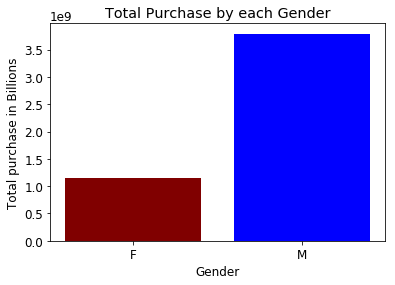

In [191]:
test_df=test_df[test_df.Purchase < 21000]
#grouping by gender to see the purchase by gender
purchase_bygender=test_df.groupby(['Gender']).sum()['Purchase']

#created a new column
df_purchase_bygender=pd.DataFrame({"Total Purchase":purchase_bygender})

#changing the Gender index to columns for bar chart analysis
df_purchase_bygender=df_purchase_bygender.reset_index(level=['Gender'])
x_axis=df_purchase_bygender['Gender']
y_axis=df_purchase_bygender['Total Purchase']
plt.bar(x_axis,y_axis, color=['maroon','blue'])
plt.title("Total Purchase by each Gender")
x="Gender"
plt.xlabel(x)
y="Total purchase in Billions"
y=plt.ylabel(y)

Oops! Total Purchase by Males is more than Females.
Let us see the count of Male and Female and their average spent.


### Plotting Total count of each gender

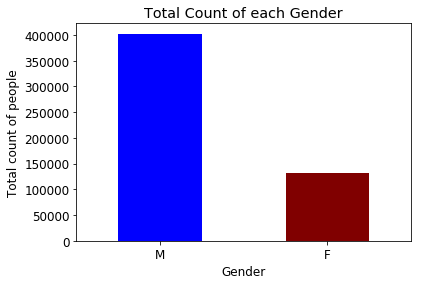

In [192]:
#Analysis to see the total count for each gender
#using groupby plots
gender_count=test_df['Gender'].value_counts()
gender_count.plot(kind='bar',color=['blue','maroon'])

#using tick locations for rotating the y-label
tick_locations=[value for value in np.arange(2)]
plt.xticks(tick_locations, rotation=0)
plt.title("Total Count of each Gender")
x="Gender"
plt.xlabel(x)
y="Total count of people"
y=plt.ylabel(y)

It can be seen that both the total count of males and total purchase by males is high. An average of purchase amount for each gender will give some clarity

### Plotting the average amount spent by each gender

Gender
F    8730.847632
M    9414.413389
Name: Purchase, dtype: float64


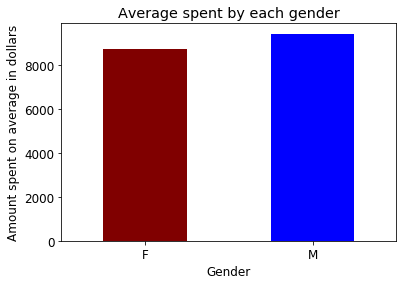

In [193]:
#Average spend by gender
df_avg_bygender=test_df.groupby(['Gender']).mean()['Purchase']
# plt.figure(figsize=(5, 5))
df_avg_bygender.plot(kind="bar", color=["maroon",'blue'])
tick_locations=[value for value in np.arange(2)]
plt.xticks(tick_locations, rotation=0)

plt.title("Average spent by each gender")
x="Gender"
plt.xlabel(x)
y="Amount spent on average in dollars"
y=plt.ylabel(y)
print(df_avg_bygender.head())

Average Purchase by Male is more just by a 1000$ ! 

## Analysis of Total Purchase by males and females for each age group
+ filtered the dataset for each gender and created new dataframes
+ grouped by age group and calculated the total purchase for each age group
+ Merged the two datasets with an outer join on 'Age'



In [194]:
#filtering out only the male data for analysis
df_male=test_df.loc[test_df["Gender"]=='M',:]
df_female=test_df.loc[test_df["Gender"]=='F',:]

#grouping by male, age and their respective purchase
df_male2=df_male.groupby(['Age']).sum()['Purchase']
df_female2=df_female.groupby(['Age']).sum()['Purchase']

#changing into dataframe
df_male3=pd.DataFrame({"Total Purchase by male":df_male2})
df_female3=pd.DataFrame({"Total Purchase by female":df_female2})

#inplace is overwriting the new column rather than saving in a new column/csv
# df_male3=df_male2.rename(columns={"Purchase":"Total purchase by male"},inplace=True)
# df_female3=df_female2.rename(columns={"Purchase":"Total purchase by female"},inplace=True)

#changing the group by index to columns , so that merge join works
df_male4=df_male3.reset_index(level=['Age'])
df_female4=df_female3.reset_index(level=['Age'])

df_merged_purchase_byage_gender = pd.merge(df_male4, df_female4, on="Age", how="outer")
df_merged_purchase_byage_gender

,Age,Total Purchase by male,Total Purchase by female
0,0-17,89348550,41253119
1,18-25,691003746,200611778
2,26-35,1543748394,428267701
3,36-45,757335213,235444900
4,46-50,292944742,112865784
5,51-55,266931004,85773937
6,55+,149147713,43522549


C:\Users\karis\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


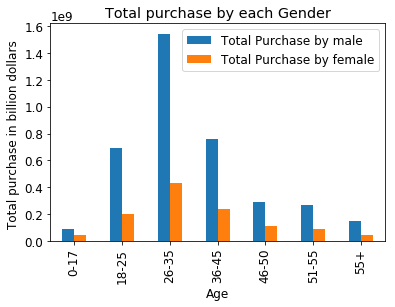

In [195]:
df_merged_purchase_byage_gender.plot(x=['Age'],y=['Total Purchase by male','Total Purchase by female'], kind='bar')
plt.title("Total purchase by each Gender")
x="Age"
plt.xlabel(x)
y="Total purchase in billion dollars "
y=plt.ylabel(y)

Even after removing outliers, Total purchase by males is still found to be higher for each age group, highest being the age group of 26-35

## The total purchase by city category

City_Category
A    1274892803
B    2051964348
C    1611341979
Name: Purchase, dtype: int64


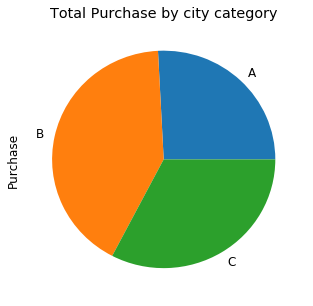

In [196]:
df_groupby_citycategory=test_df.groupby('City_Category').sum()['Purchase']
print(df_groupby_citycategory.head())

citycategory_piechart=df_groupby_citycategory.plot(kind='pie', figsize=(5,5))
plt.title("Total Purchase by city category")
plt.show()


Total Purchase remains almost same for all the city categories. However, City Category B has a higher total purchase compared to other city categories

From Business perspective, Category B city can be given more importance to increase sales

### The total purchase by stay in current city in years



Stay_In_Current_City_Years
0      661983634
1     1734223626
2      920901968
3      858474484
4+     762615418
Name: Purchase, dtype: int64


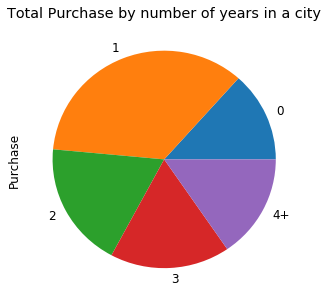

In [197]:
# Stay_In_Current_City_Years

df_groupby_currentcity=test_df.groupby('Stay_In_Current_City_Years').sum()['Purchase']
print(df_groupby_currentcity.head())

df_groupby_currentcity.plot(kind='pie', figsize=(5,5))
plt.title("Total Purchase by number of years in a city")
plt.show()


People with 1 year older is may be settling down and buying more goods!

### The total purchase by marital status

Marital_Status
0    2922000452
1    2016198678
Name: Purchase, dtype: int64


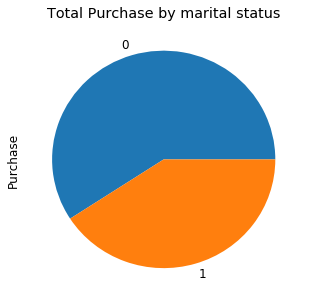

In [198]:
df_groupby_marital=test_df.groupby('Marital_Status').sum()['Purchase']
print(df_groupby_marital.head())

df_groupby_marital.plot(kind='pie', figsize=(5,5))
plt.title("Total Purchase by marital status")
plt.show()

## Predictive Analytics

### 1st Analysis

+ The independent variable that has been taken is a categorical data-Age-group
+ The Age group is converted to numeric by splitting and taking mean
+ Used linear regression analysis to predict sales based on mean of the age for a particular product_ID

### Linear Regression 

A regression line is simply calculating a line that best fits the data. This is typically done through the least squares method where the line is chosen to have the smallest overall distance to the points.

$y = \theta_0 + \theta_1 x$

* $y$ is the output response
* $x$ is the input feature
* $\theta_0$ is the y-axis intercept
* $\theta_1$ is weight coefficient (slope)
### Sklearn

The Sklearn library provides us with a Linear Regression model that will fit a line to our data. Sklearn follows a consistent API where we define a model object, fit the model to the data, and then make predictions with the model.

### Handling of different types of categorical variables can be found [here](https://www.kaggle.com/mehdidag/black-friday#BlackFriday.csv)



In [199]:
#to remove 55+ string from the Age data
test_df_onehot=test_df.copy()
test_df_onehot['Age'] = test_df_onehot['Age'].map({'55+': '55-100','26-35':'26-35','36-45':'36-45','18-25':'18-25',
                                                   '46-50':'46-50','51-55':'51-55','0-17':'0-17'})

#splitting the age group
dummy_df_age=test_df_onehot.copy()
dummy_df_age['start'], dummy_df_age['end'] = zip(*test_df_onehot['Age'].map(lambda x: x.split('-')))

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['Age'].apply(lambda x: split_mean(x))

dummy_df_age.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,start,end,age_mean
0,1000001,P00069042,F,0-17,10,A,2,0,8370,0,17,8.5
1,1000001,P00248942,F,0-17,10,A,2,0,15200,0,17,8.5
2,1000001,P00087842,F,0-17,10,A,2,0,1422,0,17,8.5
3,1000001,P00085442,F,0-17,10,A,2,0,1057,0,17,8.5
4,1000002,P00285442,M,55-100,16,C,4+,0,7969,55,100,77.5


In [200]:
#grouping by Product_ID to see the product IDs
dummy_23=dummy_df_age.groupby(['Product_ID','age_mean']).sum()['Purchase']
dummy_23=dummy_23.reset_index(level=['Product_ID','age_mean'])
dummy_23.head()

,Product_ID,age_mean,Purchase
0,P00000142,8.5,593926
1,P00000142,21.5,2773687
2,P00000142,30.5,4899930
3,P00000142,40.5,2574329
4,P00000142,48.0,874719


In [201]:
#filtering by Product_ID
df_product_dummy=dummy_23.loc[dummy_23["Product_ID"]=='P00000142',:]
df_product_dummy.head()

,Product_ID,age_mean,Purchase
0,P00000142,8.5,593926
1,P00000142,21.5,2773687
2,P00000142,30.5,4899930
3,P00000142,40.5,2574329
4,P00000142,48.0,874719


Text(0,0.5,'Total Purchase')

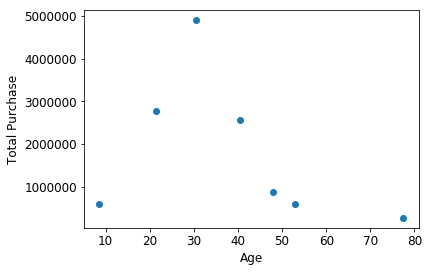

In [202]:
X=df_product_dummy.age_mean.values.reshape(-1,1)
y=df_product_dummy.Purchase.values.reshape(-1,1)
plt.scatter(X,y)
plt.xlabel("Age")
plt.ylabel("Total Purchase")

In [203]:
#Using linear regression model to fit in the X and y values

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(model)
print('coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

#predict y values using the model and compare with true output
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefficients:  [[-29179.31268794]]
y-axis intercept:  [2963968.69946852]
True output: [593926]
Predicted output: [2715944.54162102]
Prediction Error: [2122018.54162102]


Min X Value: [[8.5]]
Max X Value: [[77.5]]


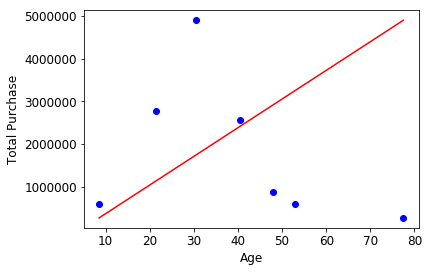

In [204]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = np.array([[y.min()]])
y_max = np.array([[y.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")
plt.xlabel("Age")
plt.ylabel("Total Purchase")
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


In [171]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2089595248462.7615
R-squared (R2 ): 0.15136633421711498


### From the above plot it is clear that there is no linear correlation between purchase and age for the product ID P00000142


### 2nd Predictive Analysis
+ The independent variable that has been taken are Gender, Marital Status & City category
+ The independent variables are encoded using get_dummies()-This is one hot encoding.The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly
+ Used multiple linear regression analysis to predict sales for a particular product ID

In [172]:
#Changing to dummies
df_1 = pd.get_dummies(dummy_df_age, columns=["Gender"])
df_2=pd.get_dummies(df_1, columns=["City_Category"])
dummy_df_age=df_2.copy()
dummy_df_age=dummy_df_age.loc[dummy_df_age["Product_ID"]=='P00000142',:]
X=dummy_df_age[['Marital_Status','Gender_M','Gender_F','City_Category_A','City_Category_B','City_Category_B']]
y=dummy_df_age['Purchase'].values.reshape(-1,1)
print(X.shape, y.shape)

(1130, 6) (1130, 1)


In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_test

array([[10849],
       [11021],
       [ 5630],
       [13459],
       [13398],
       [13468],
       [13552],
       [10776],
       [ 8087],
       [13649],
       [13662],
       [10936],
       [10627],
       [10811],
       [10601],
       [10707],
       [10742],
       [10646],
       [ 8385],
       [13236],
       [10702],
       [10817],
       [13206],
       [13553],
       [10689],
       [10838],
       [10935],
       [11055],
       [10823],
       [10568],
       [13267],
       [ 7977],
       [ 5669],
       [10695],
       [11064],
       [ 2833],
       [13511],
       [13354],
       [11030],
       [10577],
       [10927],
       [10843],
       [13645],
       [ 8104],
       [13430],
       [13594],
       [10880],
       [13405],
       [13546],
       [11074],
       [13694],
       [10949],
       [11076],
       [11072],
       [13392],
       [13463],
       [13623],
       [10730],
       [10736],
       [13443],
       [10561],
       [10573],
       [

In [174]:
# Fit the model to the training data and calculated the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score=model.score(X_test,y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

print('coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Training Score: 0.002107978964294266
Testing Score: -0.0017405789492723756
coefficients:  [[ 2.71061046e-02 -1.15873052e+02  1.15873052e+02 -3.82451529e+01
  -1.97306929e+01 -1.97306929e+01]]
y-axis intercept:  [11206.95088787]


In [175]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5192510.630472558, R2: -0.0017405789492723756


In [176]:
print(f"True output: {y_test[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y_test[0]}")


True output: [10849]
Predicted output: [11322.82393941]
Prediction Error: [473.82393941]


In [178]:
predictions_new=np.reshape(predictions,283)
print(y_test.shape)
y_test_new=np.reshape(y_test,283)
model_df=pd.DataFrame({"Prediction": predictions_new, "Actual": y_test_new})
model_df.head(10)

(283, 1)


,Actual,Prediction
0,10849,11322.823939
1,11021,11051.616451
2,5630,11091.104942
3,13459,11051.616451
4,13398,11091.077836
5,13468,11052.832683
6,13552,11283.362554
7,10776,11051.643557
8,8087,11051.616451
9,13649,11051.616451


### From the 2nd predictive analysis, it is seen that gender, marital status & city category when taken togetner, do not have positive correlation with the total purchase for a single purchase ID